### Вариант № 9

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

In [2]:
import tensorflow as tf

def f(x):
    return tf.exp(-2*x)

In [3]:
a, b = 0, 1

In [4]:
z = np.linspace(a, b, 100)
v = f(z).numpy()

In [5]:
rank_1_tensor = tf.constant(v)
rank_1_tensor

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.        , 0.98000067, 0.96040132, 0.94119394, 0.9223707 ,
       0.9039239 , 0.88584603, 0.86812971, 0.8507677 , 0.83375292,
       0.81707842, 0.8007374 , 0.78472319, 0.76902926, 0.75364919,
       0.73857671, 0.72380568, 0.70933005, 0.69514393, 0.68124152,
       0.66761715, 0.65426525, 0.64118039, 0.62835721, 0.61579049,
       0.6034751 , 0.591406  , 0.57957828, 0.5679871 , 0.55662774,
       0.54549556, 0.53458602, 0.52389466, 0.51341712, 0.50314912,
       0.49308648, 0.48322508, 0.4735609 , 0.46409001, 0.45480852,
       0.44571265, 0.4367987 , 0.42806302, 0.41950205, 0.41111229,
       0.40289032, 0.39483279, 0.3869364 , 0.37919793, 0.37161423,
       0.36418219, 0.35689879, 0.34976106, 0.34276607, 0.33591098,
       0.32919299, 0.32260935, 0.31615738, 0.30983445, 0.30363796,
       0.29756541, 0.2916143 , 0.28578221, 0.28006676, 0.27446561,
       0.26897649, 0.26359714, 0.25832537, 0.25315904, 0.24809603,
       0.24313

In [6]:
maxx = tf.reduce_max(rank_1_tensor).numpy()
minn = tf.reduce_min(rank_1_tensor).numpy()

print("Max value:", maxx)
print("Min value:", minn)

Max value: 1.0
Min value: 0.1353352832366127


2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

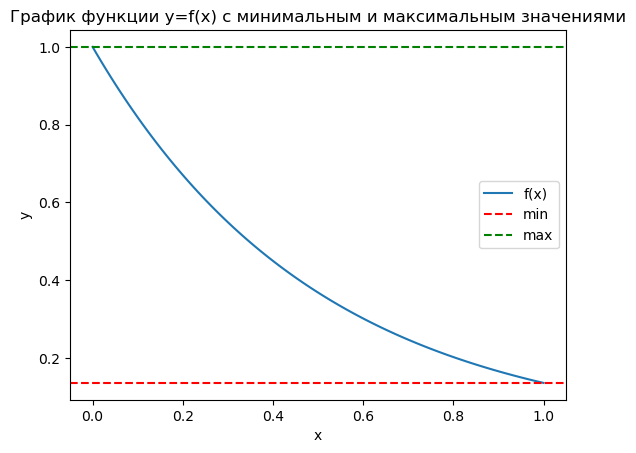

In [7]:
x = np.linspace(a, b, 100)
y = f(x)

rank_1_tensor = tf.constant(y)
min_y = minn
max_y = maxx
plt.plot(x, y, label='f(x)')
plt.axhline(min_y, color='r', linestyle='--', label='min')
plt.axhline(max_y, color='g', linestyle='--', label='max')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y=f(x) с минимальным и максимальным значениями')
plt.legend()
plt.show()

3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

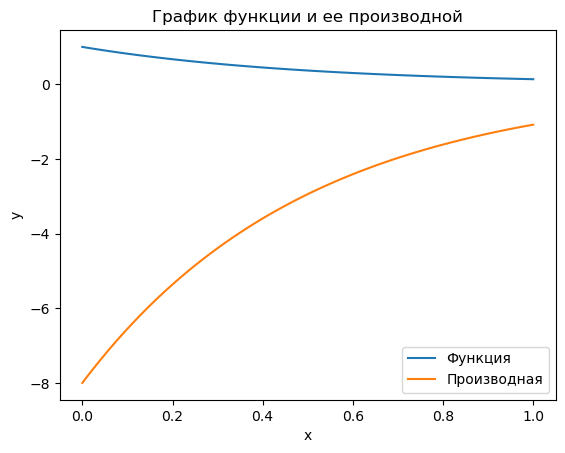

In [8]:
z = np.linspace(a, b, 100)

rank_1_tensor = tf.constant(f(z))

x_tf = tf.Variable(z, dtype=tf.float64)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x_tf)
    y = f(x_tf)
    dy_dx = tape.gradient(y, x_tf)
    d2y_dx2 = tape.gradient(dy_dx, x_tf)
    d3y_dx3 = tape.gradient(d2y_dx2, x_tf)

fig, ax = plt.subplots()
ax.plot(x, y, label='Функция')
ax.plot(x_tf, d3y_dx3.numpy(), label='Производная')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('График функции и ее производной')
ax.legend()
plt.show()

4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

In [9]:
def func(x, y):
    return tf.exp(-x) * tf.cos(y)

a, b = 0, 2
x = np.linspace(a, b, 100)
y = np.linspace(a, b, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
tensor = tf.constant(Z, dtype=tf.float64)

max_value = tf.reduce_max(tensor).numpy()
min_value = tf.reduce_min(tensor).numpy()
print("Максимальное значение функции:", max_value)
print("Минимальное значение функции:", min_value)

Максимальное значение функции: 1.0
Минимальное значение функции: -0.4161468365471424


5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

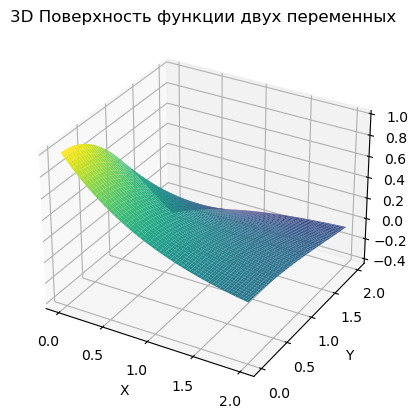

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Поверхность функции двух переменных')
plt.show()

6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

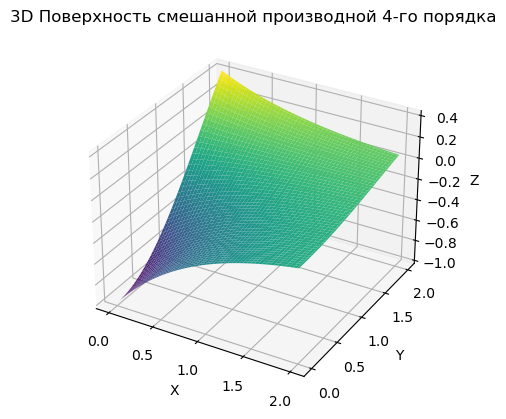

In [11]:
X_tf = tf.Variable(X, dtype=tf.float64)
Y_tf = tf.Variable(Y, dtype=tf.float64)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(X_tf)
    tape.watch(Y_tf)
    Z_xy = func(X_tf, Y_tf)
    d2Z_dx2 = tape.gradient(tape.gradient(Z_xy, X_tf), X_tf)
    d2Z_dy2 = tape.gradient(tape.gradient(Z_xy, Y_tf), Y_tf)
    d4Z_dx2dy2 = tape.gradient(tape.gradient(d2Z_dx2, Y_tf), Y_tf)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, d4Z_dx2dy2.numpy(), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Поверхность смешанной производной 4-го порядка')
plt.show()

7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал $[0, 1]$. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

In [12]:
z_scaled = (z - z.min()) / (z.max() - z.min())
v_scaled = (v - v.min()) / (v.max() - v.min())

In [13]:
def mspe(target_y, predicted_y):
    return tf.reduce_mean(tf.square(tf.divide(tf.subtract(target_y, predicted_y), target_y)))

metric = mspe

In [14]:
metric_values = []

class Model(object):
    def __init__(self):
        self.w = tf.Variable(tf.random.normal(shape=(), stddev=0.1))
        self.b = tf.Variable(tf.random.normal(shape=(), stddev=0.1))

    def __call__(self, x):
        return self.w * x + self.b

model = Model()

def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

def train(model, inputs, outputs, learning_rate):
    inputs = tf.cast(inputs, dtype=tf.float32)
    outputs = tf.cast(outputs, dtype=tf.float32)
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    
    return current_loss

list_w, list_b = [], []
epochs = range(100)
losses = []

for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    
    current_loss = train(model, z_scaled, v_scaled, learning_rate=0.01)
    losses.append(current_loss)
    
    current_metric = metric(v_scaled, model(z_scaled))
    metric_values.append(current_metric)
    
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=0.02 b=0.07, loss=0.15546
Epoch  1: w=0.02 b=0.07, loss=0.15252
Epoch  2: w=0.02 b=0.08, loss=0.14972
Epoch  3: w=0.02 b=0.08, loss=0.14704
Epoch  4: w=0.03 b=0.09, loss=0.14449
Epoch  5: w=0.03 b=0.09, loss=0.14205
Epoch  6: w=0.03 b=0.10, loss=0.13972
Epoch  7: w=0.03 b=0.10, loss=0.13749
Epoch  8: w=0.03 b=0.11, loss=0.13537
Epoch  9: w=0.03 b=0.11, loss=0.13334
Epoch 10: w=0.03 b=0.11, loss=0.13140
Epoch 11: w=0.03 b=0.12, loss=0.12954
Epoch 12: w=0.03 b=0.12, loss=0.12776
Epoch 13: w=0.03 b=0.13, loss=0.12607
Epoch 14: w=0.03 b=0.13, loss=0.12444
Epoch 15: w=0.03 b=0.14, loss=0.12289
Epoch 16: w=0.03 b=0.14, loss=0.12140
Epoch 17: w=0.03 b=0.14, loss=0.11997
Epoch 18: w=0.03 b=0.15, loss=0.11860
Epoch 19: w=0.03 b=0.15, loss=0.11729
Epoch 20: w=0.03 b=0.15, loss=0.11603
Epoch 21: w=0.03 b=0.16, loss=0.11483
Epoch 22: w=0.03 b=0.16, loss=0.11367
Epoch 23: w=0.03 b=0.16, loss=0.11256
Epoch 24: w=0.03 b=0.17, loss=0.11150
Epoch 25: w=0.03 b=0.17, loss=0.11047
Epoch 26: w=

In [15]:
predictions = model(z_scaled)

In [16]:
print(metric(z_scaled,predictions))

1.8856401711628526e+28


8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля `tf.math`.

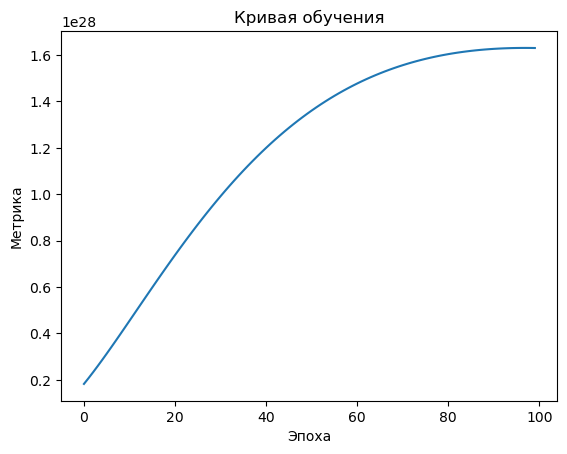

In [17]:
import matplotlib.pyplot as plt

plt.plot(epochs, metric_values)
plt.title('Кривая обучения')
plt.xlabel('Эпоха')
plt.ylabel('Метрика')
plt.show()

9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

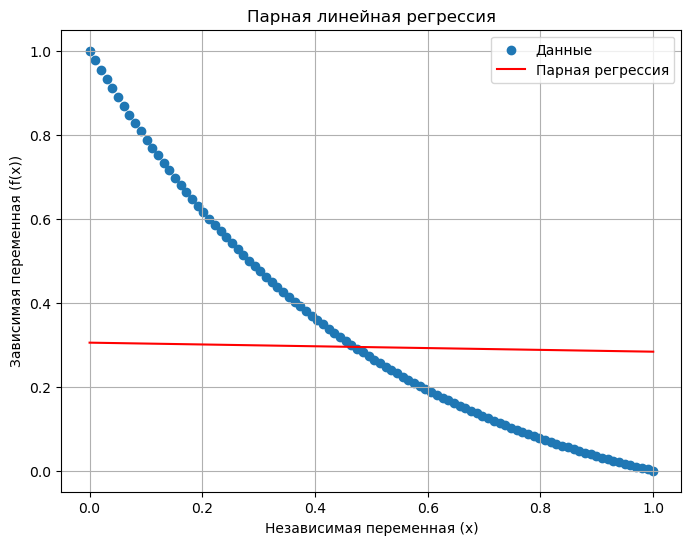

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(z_scaled, v_scaled, label='Данные')
plt.plot(z_scaled, predictions, color='red', label='Парная регрессия')
plt.xlabel('Независимая переменная (x)')
plt.ylabel('Зависимая переменная (f(x))')
plt.title('Парная линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()